In [7]:
from astropy.io import fits 
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit

In [8]:
data = fits.open("/Users/natachaupra/Downloads/manga-8312-12701-LOGCUBE.fits.gz")

In [9]:
wave = data['WAVE'].data

In [10]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))

In [11]:
ivar = np.transpose(data["IVAR"].data, axes=(2, 1, 0))

## Choose 1 wavelength at H$\alpha$

In [12]:
wave_index = np.where(wave <= 6563)

In [13]:
# We'll go with this wavelength for now
wave[wave_index[-1][-1]], wave_index[-1][-1]

(6562.9636672922, 2582)

## Try to do the loop with just one wavelength first

#### There must be a better idea than a double for loop I'm having rn =.=

In [14]:
lst = []
for i in range(76):
    for j in range(76):

        sigma = np.sqrt(1 / ivar[i][j][wave_index[-1][-1]]) if ivar[i][j][wave_index[-1][-1]] != 0 else 0.0
#         print(sigma)
#         print(sigma)
#         print(ivar[i][j][wave_index[-1][-1]])

        if flux[i][j][wave_index[-1][-1]] < sigma:
#             print('1',flux[i][j][wave_index[-1][-1]], sigma)
            lst.append(0)
        else:
#             print('0',flux[i][j][wave_index[-1][-1]],sigma)
            lst.append(flux[i][j][wave_index[-1][-1]])
lst = np.array(lst)
res = lst.sum()

In [15]:
# Apparently it's 0.0 for every wavelength I've tried. And I've tried quite a few wavelength already.

# It's not now, I was just stupid and use np.append wrongly hehehe :)

res

144.46164772845805

## Trying to do loop with multiple wavelengths at once while I still can't figure out how to do just one wavelenth alone =.=

I got it now =.= I was just being stupid hehe :)

### Get the range of wavelengths first 

wavelength chosen from H$\alpha$ region from the observed plot in the first notebook

In [16]:
wavelength_range = np.where((wave >= 6720) & (wave <= 6790))[0]

In [17]:
wavelength_range

array([2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695,
       2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706,
       2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717,
       2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728,
       2729])

In [18]:
flux_for_compare = []
ivar_for_compare = []

for i in wavelength_range:
    flux_for_compare.append(flux[:,:,i].flatten())
    ivar_for_compare.append(ivar[:,:,i].flatten())

flux_for_compare = np.array(flux_for_compare)
ivar_for_compare = np.array(ivar_for_compare)

## Now the loop!!!

Hell yeah this is fun. I'm excited !!


There is definitely a better way to do this than what I did down below, but yeah... 
(Take this for now. Let me at least get the idea of how to do this first)

In [19]:
result = []
sumres = []

for i in range(len(wavelength_range)):
    for j in range(5776):
        sigma = np.sqrt(1 / ivar_for_compare[i][j]) if ivar_for_compare[i][j] != 0 else 0
        
        if flux_for_compare[i][j] < sigma:
            result.append(0)
        else:
            result.append(flux_for_compare[i][j])
    sumres.append(sum(result))
    result = []


In [20]:
result_2sigma = []
sumres_2sigma = []

for i in range(len(wavelength_range)):
    for j in range(5776):
        sigma = np.sqrt(1 / ivar_for_compare[i][j]) if ivar_for_compare[i][j] != 0 else 0
        
        if flux_for_compare[i][j] < (2*sigma):
            result_2sigma.append(0)
        else:
            result_2sigma.append(flux_for_compare[i][j])
    sumres_2sigma.append(sum(result_2sigma))
    result_2sigma = []

In [21]:
result_3sigma = []
sumres_3sigma = []

for i in range(len(wavelength_range)):
    for j in range(5776):
        sigma = np.sqrt(1 / ivar_for_compare[i][j]) if ivar_for_compare[i][j] != 0 else 0
        
        if flux_for_compare[i][j] < (3*sigma):
            result_3sigma.append(0)
        else:
            result_3sigma.append(flux_for_compare[i][j])
    sumres_3sigma.append(sum(result_3sigma))
    result_3sigma = []

In [22]:
y = sumres
y2 = sumres_2sigma
y3 = sumres_3sigma
x = [wave[i] for i in wavelength_range]

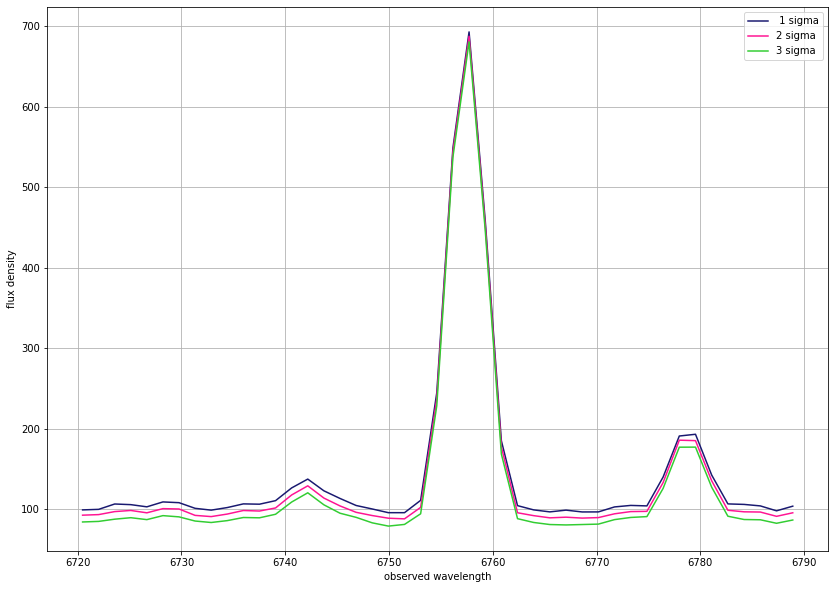

In [23]:
plt.figure(figsize = (14,10))
plt.grid()
plt.plot(x, y, color = 'midnightblue', label = ' 1 sigma') 
plt.plot(x, y2, color = 'deeppink', label = '2 sigma')
plt.plot(x, y3, color = 'limegreen', label = '3 sigma')
plt.xlabel('observed wavelength')
plt.ylabel('flux density')
plt.legend()

# Waittttt, the picture above is not different from the one in the first notebook loey na...

#### Update :

After doing it with 2sigma and 3sigma, the graph looks slightly different, as in it lowers (nothing unexpected), but the peak part is roughly the same, which again, not surprising.

## Trying the center of flux (?) method 

In [24]:
thingy = np.array(flux[:,:,2708].flatten())

In [25]:
coord = [i for i in range(76)]*76

In [26]:
x_coord = np.array([[i]*76 for i in range(76)]).flatten()
y_coord = np.array([i for i in range(76)]*76)
x = 0
y = 0
total_thingy = thingy.sum()

In [27]:
for i in range(5776):
    x += thingy[i]*x_coord[i]
    y += thingy[i]*y_coord[i]

In [28]:
print((x/total_thingy, y/total_thingy))

# It's actually kinda center na, given center is (35,35)
# Hmmm...this method is amazing! Props to P'Guitar !!!!!!!! 

(35.36015284552771, 37.2278245556943)
